<a href="https://colab.research.google.com/github/Andicleomj/Robotika-dan-Sistem-Cerdas/blob/main/Week11/Code%20Python/Information%20Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Andi Cleopatra Maryam Jamila
#### 1103213071
#### Tugas Week 11

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

* cv2 (OpenCV) untuk pengolahan gambar.
* numpy untuk manipulasi array.
* matplotlib.pyplot untuk menampilkan gambar.
* KMeans dari sklearn.cluster untuk ekstraksi warna dominan menggunakan clustering.

In [2]:
# Fungsi untuk menampilkan gambar
def show_image(title, img, cmap=None):
    plt.figure(figsize=(8, 6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

* Fungsi ini digunakan untuk menampilkan gambar dengan judul tertentu menggunakan Matplotlib. Parameter opsional cmap memungkinkan pengaturan colormap (misalnya, untuk gambar grayscale).

In [3]:
# Load gambar
image_path = "/content/sample_data/pelangii.jpg"
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"Gambar di {image_path} tidak ditemukan!")

# Ubah warna gambar dari BGR ke RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

* Gambar dimuat dari path "/content/sample_data/pelangii.jpg" menggunakan cv2.imread. Jika file gambar tidak ditemukan, program menghentikan eksekusi dengan error.
* Karena OpenCV membaca gambar dalam format BGR, gambar diubah ke format RGB (yang lebih umum digunakan dalam Matplotlib) menggunakan cv2.cvtColor.

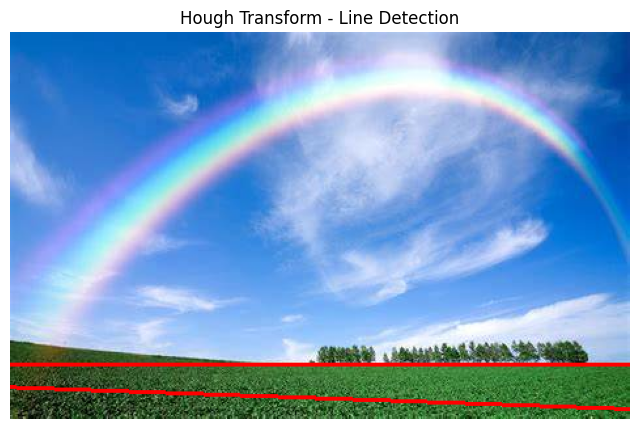

In [4]:
# === 1. Ekstraksi garis dengan Hough Transform ===
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
line_img = img_rgb.copy()
if lines is not None:
    for rho, theta in lines[:, 0]:
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a * rho, b * rho
        x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * a)
        x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * a)
        cv2.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
show_image("Hough Transform - Line Detection", line_img)

* Gambar output menunjukkan hasil deteksi garis menggunakan transformasi Hough pada gambar asli. Garis merah yang ditampilkan mewakili garis-garis yang terdeteksi oleh algoritma. Dalam hal ini, garis merah horizontal di bagian bawah gambar mengindikasikan bahwa algoritma berhasil mendeteksi garis horizon atau batas antara langit dan daratan.

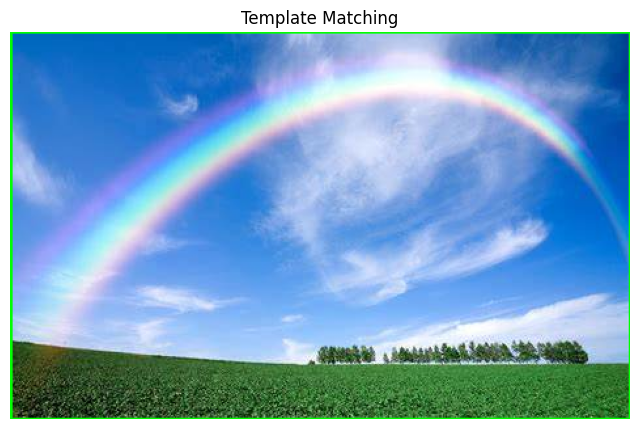

In [6]:
# === 2. Template Matching untuk Deteksi Objek ===
template_path = "/content/sample_data/pelangii.jpg"
template = cv2.imread(template_path, 0)
if template is None:
    raise FileNotFoundError(f"Template di {template_path} tidak ditemukan!")
w, h = template.shape[::-1]
res = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(res >= threshold)
template_img = img_rgb.copy()
for pt in zip(*loc[::-1]):
    cv2.rectangle(template_img, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)
show_image("Template Matching", template_img)

* Template matching teknik dalam pengolahan citra yang digunakan untuk menemukan kemiripan antara sebuah template (pola yang dicari) dengan bagian-bagian dari citra yang lebih besar.

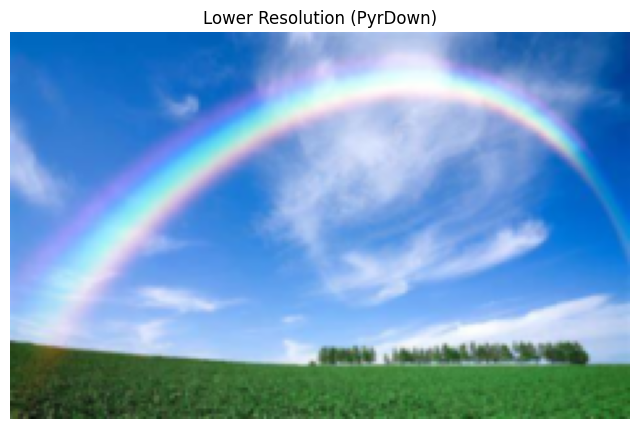

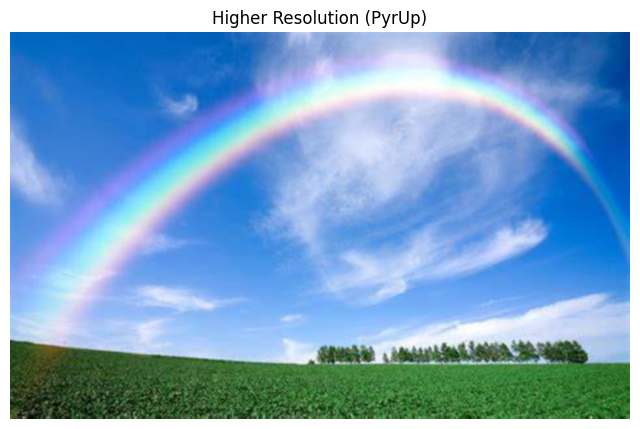

In [7]:
# === 3. Pembuatan Pyramid Gambar ===
lower_reso = cv2.pyrDown(img_rgb)
higher_reso = cv2.pyrUp(img_rgb)
show_image("Lower Resolution (PyrDown)", lower_reso)
show_image("Higher Resolution (PyrUp)", higher_reso)

* Gambar ini merupakan hasil dari proses penurunan resolusi (atau sering disebut downsampling) pada sebuah gambar. Digunakan dalam pengolahan citra digital untuk mengurangi ukuran file, mempercepat pemrosesan, atau sebagai bagian dari algoritma yang lebih kompleks.
* Gambar ini merupakan hasil dari proses peningkatan resolusi (atau sering disebut upsampling) pada sebuah gambar. Digunakan dalam pengolahan citra digital untuk memperbesar ukuran gambar atau untuk meningkatkan detail pada gambar yang sudah ada.

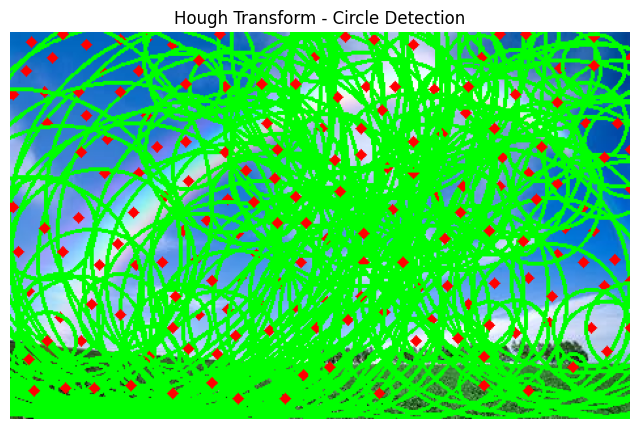

In [8]:
# === 4. Deteksi Lingkaran dengan Hough Transform ===
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)
circle_img = img_rgb.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(circle_img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(circle_img, (i[0], i[1]), 2, (255, 0, 0), 3)
show_image("Hough Transform - Circle Detection", circle_img)

* Gambar yang ditampilkan merupakan hasil dari penerapan transformasi Hough untuk mendeteksi lingkaran pada sebuah citra.



In [9]:
# === 5. Ekstraksi Warna Dominan pada Gambar ===
def extract_dominant_color(image, k=3):
    pixels = image.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    dominant_color = kmeans.cluster_centers_.astype(int)
    return dominant_color

colors = extract_dominant_color(img_rgb, k=5)
print("Dominant Colors (RGB):")
for i, color in enumerate(colors):
    print(f"Color {i + 1}: {color}")

Dominant Colors (RGB):
Color 1: [ 55 101  49]
Color 2: [150 185 239]
Color 3: [ 94 148 223]
Color 4: [ 24 109 196]
Color 5: [203 219 243]


* Untuk mengekstraksi warna dominan pada gambar menggunakan K-Means clustering untuk mengelompokkan piksel menjadi beberapa cluster warna, lalu mencetak nilai RGB dari pusat cluster sebagai warna dominan.

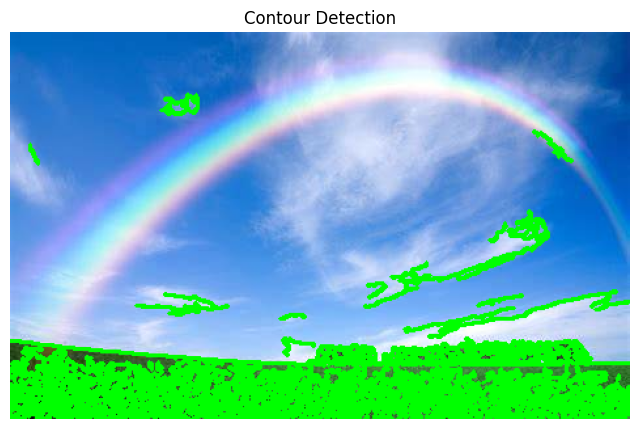

Simulasi selesai!


In [10]:
# === 6. Deteksi Kontur pada Gambar ===
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_img = img_rgb.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)
show_image("Contour Detection", contour_img)

print("Simulasi selesai!")

* Gambar yang ditampilkan merupakan hasil dari proses deteksi kontur pada sebuah citra.